<a href="https://colab.research.google.com/github/anusiaskubis/Students/blob/main/Analiza_i_eksploracja_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UWAGI PO II ETAPIE**


Family_History i Chronic_Illness lepiej przekształcić do pojedynczych zmiennych binarnych używając OneHotEncoder'a  np. get_dummies(drop_first=True)

Nie podano typów zmiennych (numeryczna, kategoryczna z ew. rozbiciem na porządkową i nominalną)

Którego współczynnika korelacji użyto? ✅ **Dodano opis w sprawku**

Rysunek 4 pokazuje jaki jest udział procentowy danego kierunku studiów w danym poziomie lęku. Ciekawa byłaby zmiana grupowania i przedstawienie udziału procentowego poziomów lęku wśród studentów danego kierunku. Czyli teraz wiem, że spośród wszystkich studentów, którzy odczuwają lęk na poziomie 5, 38% z nich to studenci prawa. A ja chciałabym jeszcze wiedzieć jaki procent studentów prawa odczuwa lęk na poziomie 5.
Analogicznie Rysunek 5.
Oba rysunki, 4 i 5, są w porządku i przedstawiają pewną wartościową informację. Po prostu wydaje mi się, że informacja komplementarna też byłaby ciekawa.

" Studenci studiujący informatykę są skłonni do odczuwania depresji 2.65 razy częściej niż studenci pozostałych kierunków." - należałoby jeszcze przedstawić jak zostało to obliczone i jak Państwo zdefiniowali "odczuwać depresję" ✅ **Dodano opis w sprawku**


Na rysunku 13 nie jest jasne gdzie jest mężatka/żonaty a gdzie single. ✅
**Poprawiony i wklejony do sprawka wykres**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [33]:
# https://www.kaggle.com/datasets/sonia22222/students-mental-health-assessments
df=pd.read_csv('/content/sample_data/students_mental_health_survey.csv')
df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


# Nowa sekcja

In [34]:
df.shape

(7022, 20)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [36]:
# Sprawdzenie jakie wartości przyjmują dane w poszczególnych kolumnach

for column in df.columns:
    print(f'\n{column}:')
    print(df[column].unique())


Age:
[25 24 19 18 21 23 28 22 27 20 31 26 35 30 32 29 34 33]

Course:
['Others' 'Engineering' 'Business' 'Computer Science' 'Medical' 'Law']

Gender:
['Male' 'Female']

CGPA:
[3.56 2.44 3.74 3.65 3.4  3.35 3.8  3.05  nan 3.19 3.26 3.2  3.61 3.85
 3.46 3.43 3.38 3.5  3.6  3.08 3.88 3.21 3.62 3.16 3.71 3.48 3.27 3.41
 3.22 3.33 3.01 3.97 4.   3.63 2.99 3.11 3.02 3.66 3.09 3.12 3.82 3.23
 3.7  2.95 3.73 3.64 3.79 3.59 3.34 3.87 3.24 3.44 3.1  3.25 3.53 3.
 3.29 2.98 3.04 3.51 3.75 3.86 3.78 3.77 3.72 3.45 3.06 3.84 3.92 3.28
 2.86 3.37 3.54 3.31 3.94 3.9  3.52 3.32 3.14 3.68 2.85 2.91 3.99 3.81
 3.07 3.3  3.39 3.42 3.55 2.94 3.93 3.36 3.67 3.91 3.49 3.58 3.13 3.69
 3.98 3.47 2.92 3.15 2.79 3.83 3.57 3.89 2.97 3.76 3.17 3.03 2.77 2.87
 2.64 2.84 2.88 2.8  3.18 2.89 2.82 2.73 2.96 3.96 2.83 2.7  3.95 2.76
 2.68 2.93 2.9  2.65 2.81 2.69 2.6  2.58 2.75 2.74 2.78 2.52 2.61 2.66
 2.63 2.71 2.49 2.67]

Stress_Level:
[3 0 4 2 1 5]

Depression_Score:
[3 0 1 4 2 5]

Anxiety_Score:
[2 0 3 4 5 1]

S

In [37]:
# Sprawdzenie liczebności każdej odpowiedzi dla każdej kolumny
for column in df.columns:
    print(f"--- {column} ---")
    print(df[column].value_counts())
    print()

--- Age ---
21    777
18    738
20    723
19    710
22    694
23    642
24    539
26    457
25    455
27    323
28    260
29    189
30    162
31    124
32     98
33     55
34     45
35     31
Name: Age, dtype: int64

--- Course ---
Medical             2105
Law                 1385
Engineering         1072
Computer Science    1028
Business             717
Others               715
Name: Course, dtype: int64

--- Gender ---
Male      3547
Female    3475
Name: Gender, dtype: int64

--- CGPA ---
4.00    332
3.51    106
3.58    106
3.55    105
3.50    103
       ... 
2.66      1
2.63      1
2.71      1
2.49      1
2.67      1
Name: CGPA, Length: 143, dtype: int64

--- Stress_Level ---
3    1405
2    1279
1    1233
0    1098
5    1015
4     992
Name: Stress_Level, dtype: int64

--- Depression_Score ---
3    1388
1    1308
2    1304
0    1295
4     884
5     843
Name: Depression_Score, dtype: int64

--- Anxiety_Score ---
3    1429
2    1297
1    1270
0    1243
4     912
5     871
Name: Anxiety

In [38]:
# Sprawdzenie braków danych w poszczególnych kolumnach
missing_values = df.isnull().sum()

# Wyświetlenie ilości braków danych dla każdej kolumny
print("Liczba braków danych w poszczególnych kolumnach:")
print(missing_values)



Liczba braków danych w poszczególnych kolumnach:
Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64


In [39]:
# Usuwanie rekordów z pustymi wartościami
df_cleaned = df.dropna()

# Sprawdzenie, czy brakujące wartości zostały usunięte
missing_values_cleaned = df_cleaned.isnull().sum()

# Wyświetlenie ilości brakujących wartości po usunięciu rekordów
print("Liczba brakujących wartości po usunięciu rekordów:")
print(missing_values_cleaned)

df = df_cleaned

Liczba brakujących wartości po usunięciu rekordów:
Age                            0
Course                         0
Gender                         0
CGPA                           0
Stress_Level                   0
Depression_Score               0
Anxiety_Score                  0
Sleep_Quality                  0
Physical_Activity              0
Diet_Quality                   0
Social_Support                 0
Relationship_Status            0
Substance_Use                  0
Counseling_Service_Use         0
Family_History                 0
Chronic_Illness                0
Financial_Stress               0
Extracurricular_Involvement    0
Semester_Credit_Load           0
Residence_Type                 0
dtype: int64


In [40]:
# Wyświetlenie kolumn, które posiadają typ danych object

object_columns = df.select_dtypes(include=['object'])
object_columns.head()


,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
0,Others,Male,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,Moderate,On-Campus
1,Engineering,Female,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,Low,On-Campus
2,Business,Female,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,High,On-Campus
4,Business,Male,Good,Low,Average,High,Married,Never,Never,No,Yes,High,On-Campus
5,Medical,Female,Good,Moderate,Good,High,Single,Never,Never,No,No,Moderate,Off-Campus


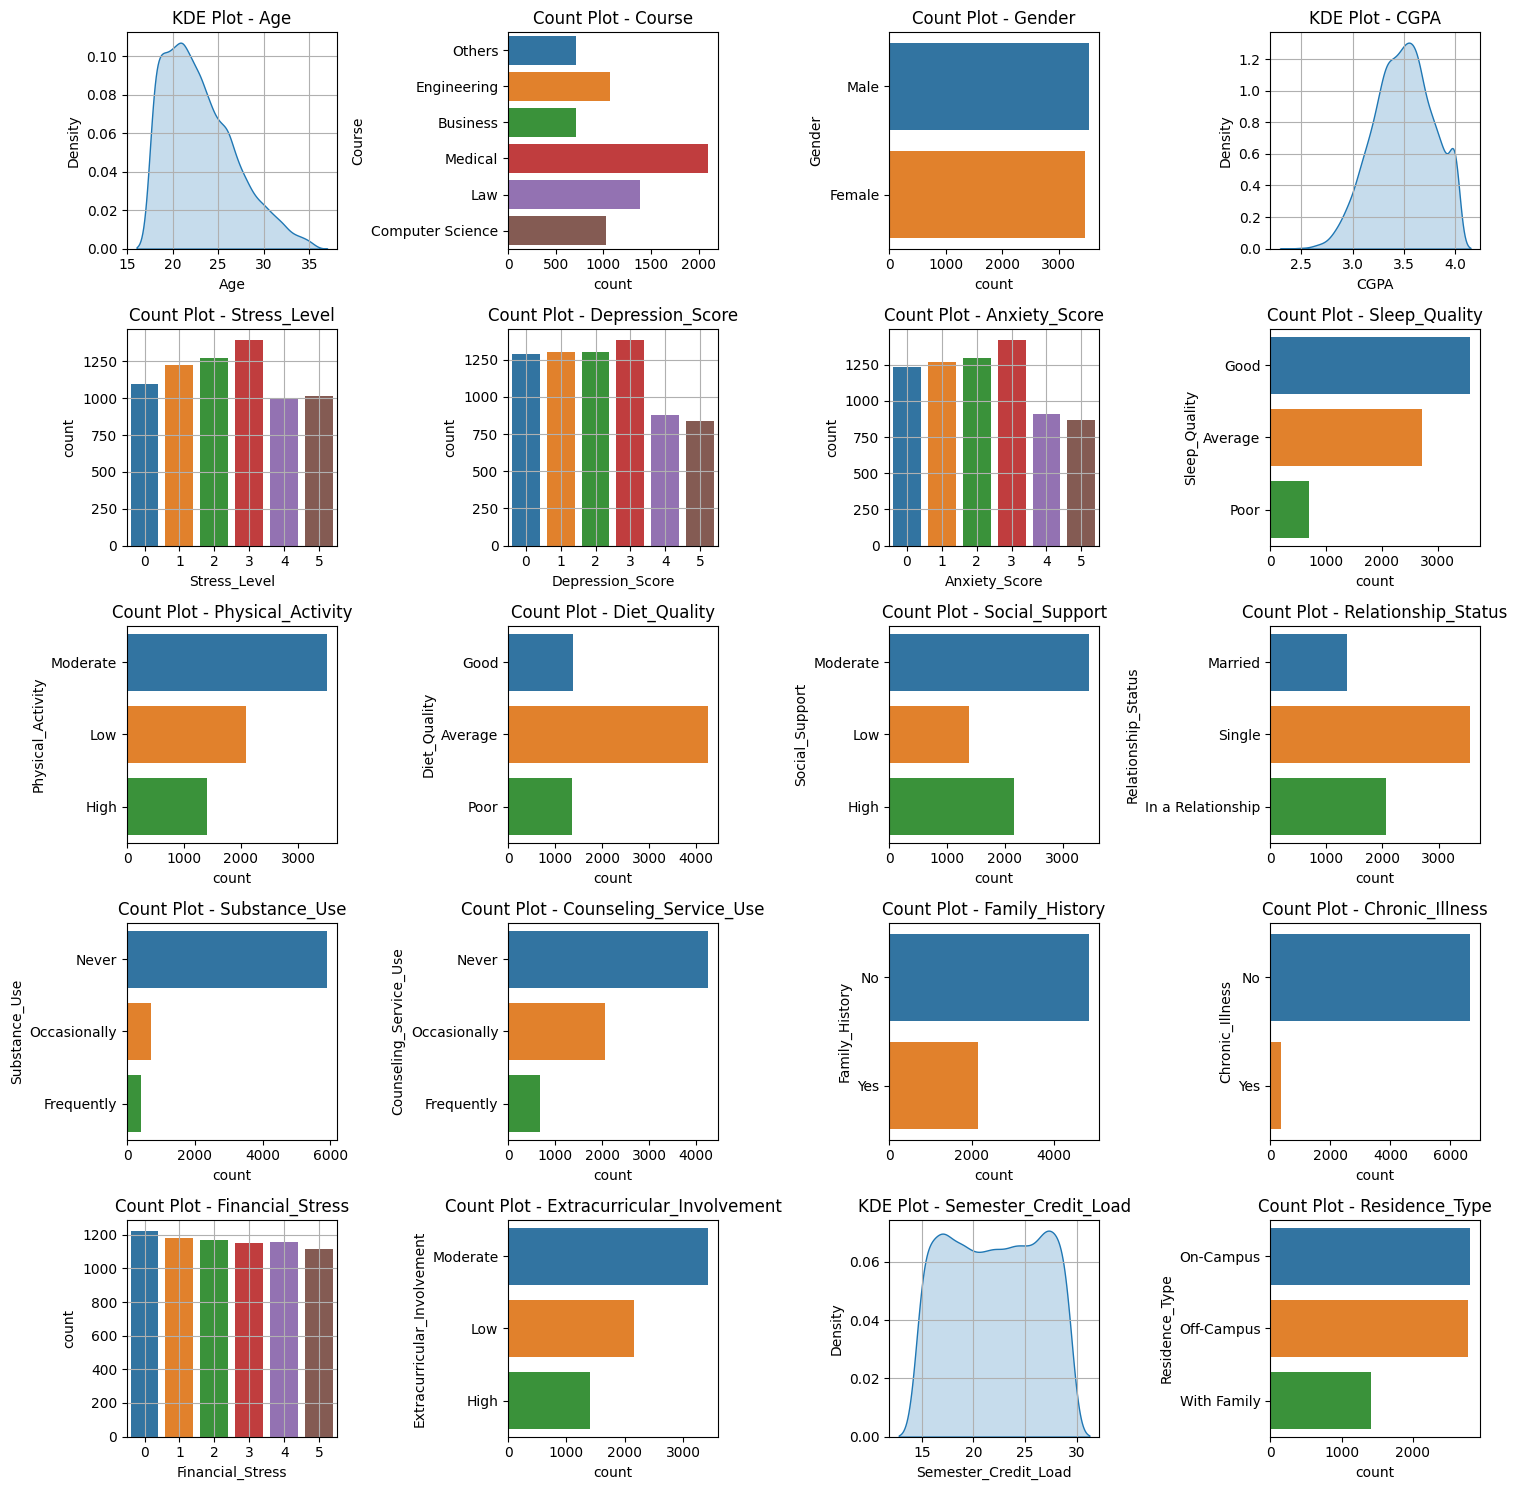

In [41]:
# Ustawienia liczby wierszy i kolumn na podstawie liczby kolumn w ramce danych
num_rows = 5
num_cols = (df.shape[1] // num_rows) + (df.shape[1] % num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, column in enumerate(df.columns, start=1):
    row, col = (i-1) // num_cols, (i-1) % num_cols
    ax = axes[row, col]

    if df[column].dtype == 'object':
        sns.countplot(y=df[column], ax=ax)
        ax.set_title(f'Count Plot - {column}')
    elif np.issubdtype(df[column].dtype, np.integer) and (df[column].min() >= 0) and (df[column].max() <= 5):
        sns.countplot(x=df[column], ax=ax)
        ax.set_title(f'Count Plot - {column}')
        ax.grid()
    else:
        sns.kdeplot(df[column], fill=True, ax=ax)
        ax.set_title(f'KDE Plot - {column}')
        ax.grid()

plt.tight_layout()
plt.show()



<ipython-input-42-1633a0636d4f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


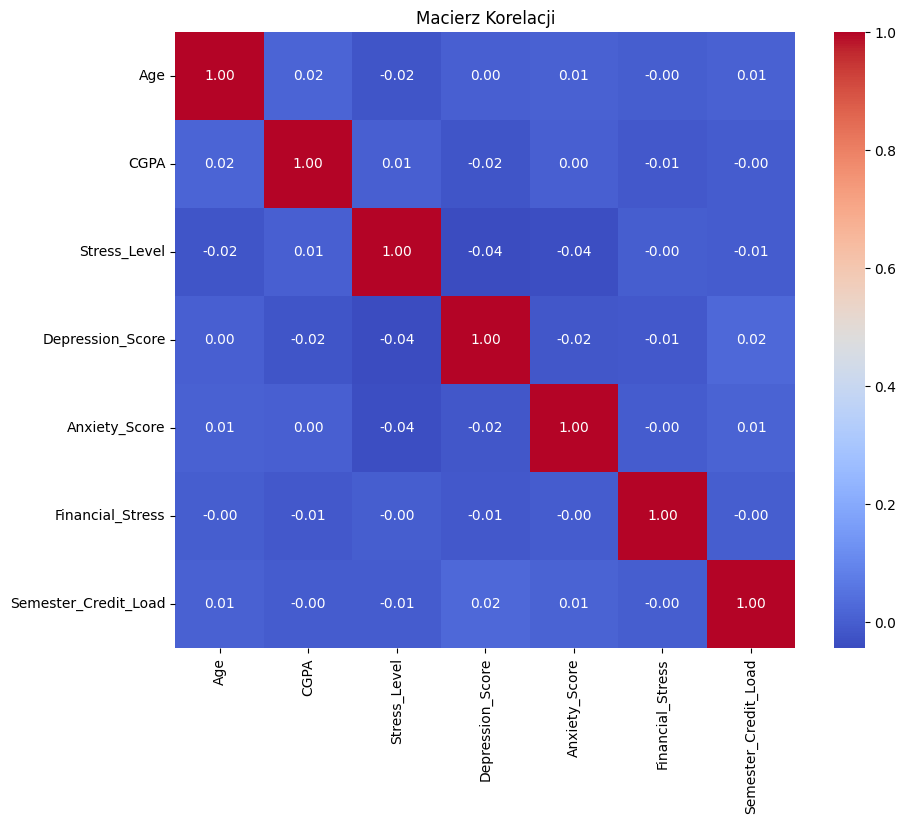

In [42]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz Korelacji")
plt.show()

Jednym z popularnych podejść do normalizacji danych kategorialnych jest przekształcenie ich na **formę numeryczną**, tak aby można było zastosować algorytmy, które wymagają danych numerycznych, na przykład algorytmy uczenia maszynowego.

**Label Encoding** przypisuje unikalną liczbę całkowitą każdej kategorii.

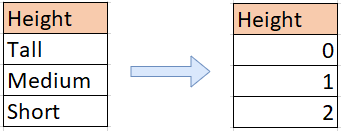

In [43]:
# Wybrane kolumny do kodowania
columns_to_encode = ['Gender', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality',
                     'Social_Support', 'Substance_Use', 'Counseling_Service_Use',
                     'Family_History', 'Chronic_Illness', 'Extracurricular_Involvement']

for column in columns_to_encode:
    # Utwórz obiekt LabelEncoder dla danej kolumny
    label_encoder = LabelEncoder()

    # Zapamiętaj unikalne wartości przed kodowaniem
    original_values = df[column].unique()

    if column == 'Gender':
      mapped_values = {'Male':0,'Female':1}
    elif column in ['Sleep_Quality', 'Diet_Quality']:
      mapped_values = {'Poor':0, 'Average':1, 'Good':2}
    elif column in ['Physical_Activity', 'Social_Support', 'Extracurricular_Involvement']:
      mapped_values = {'Low':0, 'Moderate':1, 'High':2}
    elif column in ['Substance_Use', 'Counseling_Service_Use']:
      mapped_values = {'Never':0, 'Occasionally':1, 'Frequently':2}
    elif column in ['Family_History', 'Chronic_Illness']:
      mapped_values = {'No':0, 'Yes':1}
    encoded_values = [mapped_values[code] for code in original_values]

    # Przeprowadź Label Encoding dla danej kolumny i zastąp oryginalne wartości
    df[column] = df[column].map(mapped_values)

    # Wyświetl unikalne wartości przed i po kodowaniu
    print(f"\nKolumna: {column}")
    print("Unikalne wartości przed kodowaniem:")
    print(original_values)
    print("Unikalne wartości po kodowaniu:")
    print(mapped_values)

# Wyświetl tabelę z zdekodowanymi kolumnami
df.head()

########################################################################
# BELOW OLD VERSION
########################################################################


# # Wybrane kolumny do kodowania
# columns_to_encode = ['Gender', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality',
#                      'Social_Support', 'Substance_Use', 'Counseling_Service_Use',
#                      'Family_History', 'Chronic_Illness', 'Extracurricular_Involvement']

# for column in columns_to_encode:
#     # Utwórz obiekt LabelEncoder dla danej kolumny
#     label_encoder = LabelEncoder()

#     # Zapamiętaj unikalne wartości przed kodowaniem
#     original_values = df[column].unique()

#     # Przeprowadź Label Encoding dla danej kolumny i zastąp oryginalne wartości
#     df[column] = label_encoder.fit_transform(df[column])

#     # Pobierz unikalne wartości po kodowaniu
#     encoded_values = df[column].unique()

#     # Wyświetl unikalne wartości przed i po kodowaniu
#     print(f"\nKolumna: {column}")
#     print("Unikalne wartości przed kodowaniem:")
#     print(original_values)
#     print("Unikalne wartości po kodowaniu:")
#     print(encoded_values)

# # Wyświetl tabelę z zdekodowanymi kolumnami
# df.head()



Kolumna: Gender
Unikalne wartości przed kodowaniem:
['Male' 'Female']
Unikalne wartości po kodowaniu:
{'Male': 0, 'Female': 1}

Kolumna: Sleep_Quality
Unikalne wartości przed kodowaniem:
['Good' 'Average' 'Poor']
Unikalne wartości po kodowaniu:
{'Poor': 0, 'Average': 1, 'Good': 2}

Kolumna: Physical_Activity
Unikalne wartości przed kodowaniem:
['Moderate' 'Low' 'High']
Unikalne wartości po kodowaniu:
{'Low': 0, 'Moderate': 1, 'High': 2}

Kolumna: Diet_Quality
Unikalne wartości przed kodowaniem:
['Good' 'Average' 'Poor']
Unikalne wartości po kodowaniu:
{'Poor': 0, 'Average': 1, 'Good': 2}

Kolumna: Social_Support
Unikalne wartości przed kodowaniem:
['Moderate' 'Low' 'High']
Unikalne wartości po kodowaniu:
{'Low': 0, 'Moderate': 1, 'High': 2}

Kolumna: Substance_Use
Unikalne wartości przed kodowaniem:
['Never' 'Occasionally' 'Frequently']
Unikalne wartości po kodowaniu:
{'Never': 0, 'Occasionally': 1, 'Frequently': 2}

Kolumna: Counseling_Service_Use
Unikalne wartości przed kodowaniem:


,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,0,3.56,3,3,2,2,1,2,1,Married,0,0,0,0,2,1,17,On-Campus
1,24,Engineering,1,2.44,0,3,0,1,0,1,0,Single,1,1,0,0,3,0,27,On-Campus
2,19,Business,1,3.74,4,0,3,2,0,1,1,In a Relationship,0,1,0,0,4,2,15,On-Campus
4,18,Business,0,3.40,3,3,4,2,0,1,2,Married,0,0,0,1,0,2,23,On-Campus
5,21,Medical,1,3.35,2,4,3,2,1,2,2,Single,0,0,0,0,5,1,19,Off-Campus


One-Hot Encoding tworzy osobne kolumny dla każdej kategorii, co pozwala na elastyczną reprezentację danych kategorycznych. Możemy to zrobić za pomocą funkcji get_dummies z biblioteki pandas.

In [44]:
# One-Hot Encoding dla 'Course', 'Residence_Type', 'Relationship_Status'
columns_to_onehot_encode = ['Course', 'Residence_Type', 'Relationship_Status']

for column in columns_to_onehot_encode:
    # Zapamiętaj unikalne wartości przed kodowaniem
    original_values = df[column].unique()

    # One-Hot Encoding dla danej kolumny
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)], axis=1)

    # Usuń pierwotną kolumnę
    df.drop(column, axis=1, inplace=True)

    # Pobierz unikalne wartości po kodowaniu
    encoded_values = df.filter(like=column).columns

    # Wyświetl unikalne wartości przed i po kodowaniu
    print(f"\nKolumna: {column}")
    print("Unikalne wartości przed kodowaniem:")
    print(original_values)
    print("Unikalne wartości po kodowaniu:")
    print(encoded_values)

# Wyświetl tabelę z zdekodowanymi kolumnami
df.head()



Kolumna: Course
Unikalne wartości przed kodowaniem:
['Others' 'Engineering' 'Business' 'Medical' 'Law' 'Computer Science']
Unikalne wartości po kodowaniu:
Index(['Course_Business', 'Course_Computer Science', 'Course_Engineering',
       'Course_Law', 'Course_Medical', 'Course_Others'],
      dtype='object')

Kolumna: Residence_Type
Unikalne wartości przed kodowaniem:
['On-Campus' 'Off-Campus' 'With Family']
Unikalne wartości po kodowaniu:
Index(['Residence_Type_Off-Campus', 'Residence_Type_On-Campus',
       'Residence_Type_With Family'],
      dtype='object')

Kolumna: Relationship_Status
Unikalne wartości przed kodowaniem:
['Married' 'Single' 'In a Relationship']
Unikalne wartości po kodowaniu:
Index(['Relationship_Status_In a Relationship', 'Relationship_Status_Married',
       'Relationship_Status_Single'],
      dtype='object')


,Age,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,...,Course_Engineering,Course_Law,Course_Medical,Course_Others,Residence_Type_Off-Campus,Residence_Type_On-Campus,Residence_Type_With Family,Relationship_Status_In a Relationship,Relationship_Status_Married,Relationship_Status_Single
0,25,0,3.56,3,3,2,2,1,2,1,...,0,0,0,1,0,1,0,0,1,0
1,24,1,2.44,0,3,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,19,1,3.74,4,0,3,2,0,1,1,...,0,0,0,0,0,1,0,1,0,0
4,18,0,3.40,3,3,4,2,0,1,2,...,0,0,0,0,0,1,0,0,1,0
5,21,1,3.35,2,4,3,2,1,2,2,...,0,0,1,0,1,0,0,0,0,1


In [45]:
# Sprawdzenie jakie wartości przyjmują dane w poszczególnych kolumnach

for column in df.columns:
    print(f'\n{column}:')
    print(df[column].unique())


Age:
[25 24 19 18 21 22 27 20 31 26 35 23 30 32 29 28 34 33]

Gender:
[0 1]

CGPA:
[3.56 2.44 3.74 3.4  3.35 3.65 3.8  3.19 3.26 3.2  3.61 3.85 3.46 3.43
 3.38 3.5  3.6  3.08 3.88 3.21 3.62 3.16 3.71 3.48 3.27 3.41 3.22 3.33
 3.01 3.97 4.   3.63 2.99 3.11 3.02 3.66 3.09 3.12 3.82 3.23 3.7  3.73
 3.79 3.59 3.34 3.87 3.24 3.44 3.1  3.25 3.53 3.   3.29 2.98 3.04 3.51
 3.75 3.86 3.78 3.77 3.72 3.45 3.06 3.05 3.84 3.92 3.28 2.86 3.64 3.37
 3.54 3.31 3.94 3.9  3.52 3.32 3.14 3.68 2.85 2.91 3.99 3.81 3.07 3.3
 3.39 3.42 3.55 2.94 3.93 3.36 3.67 3.91 3.49 3.58 3.13 3.69 3.98 3.47
 2.92 3.15 2.79 3.83 3.57 3.89 2.97 3.76 3.17 3.03 2.77 2.87 2.64 2.84
 2.88 2.8  2.95 3.18 2.89 2.82 2.73 2.96 3.96 2.83 2.7  3.95 2.76 2.68
 2.93 2.9  2.65 2.81 2.69 2.6  2.58 2.75 2.74 2.78 2.52 2.61 2.66 2.63
 2.71 2.49 2.67]

Stress_Level:
[3 0 4 2 1 5]

Depression_Score:
[3 0 4 2 1 5]

Anxiety_Score:
[2 0 3 4 5 1]

Sleep_Quality:
[2 1 0]

Physical_Activity:
[1 0 2]

Diet_Quality:
[2 1 0]

Social_Support:
[1 0 2

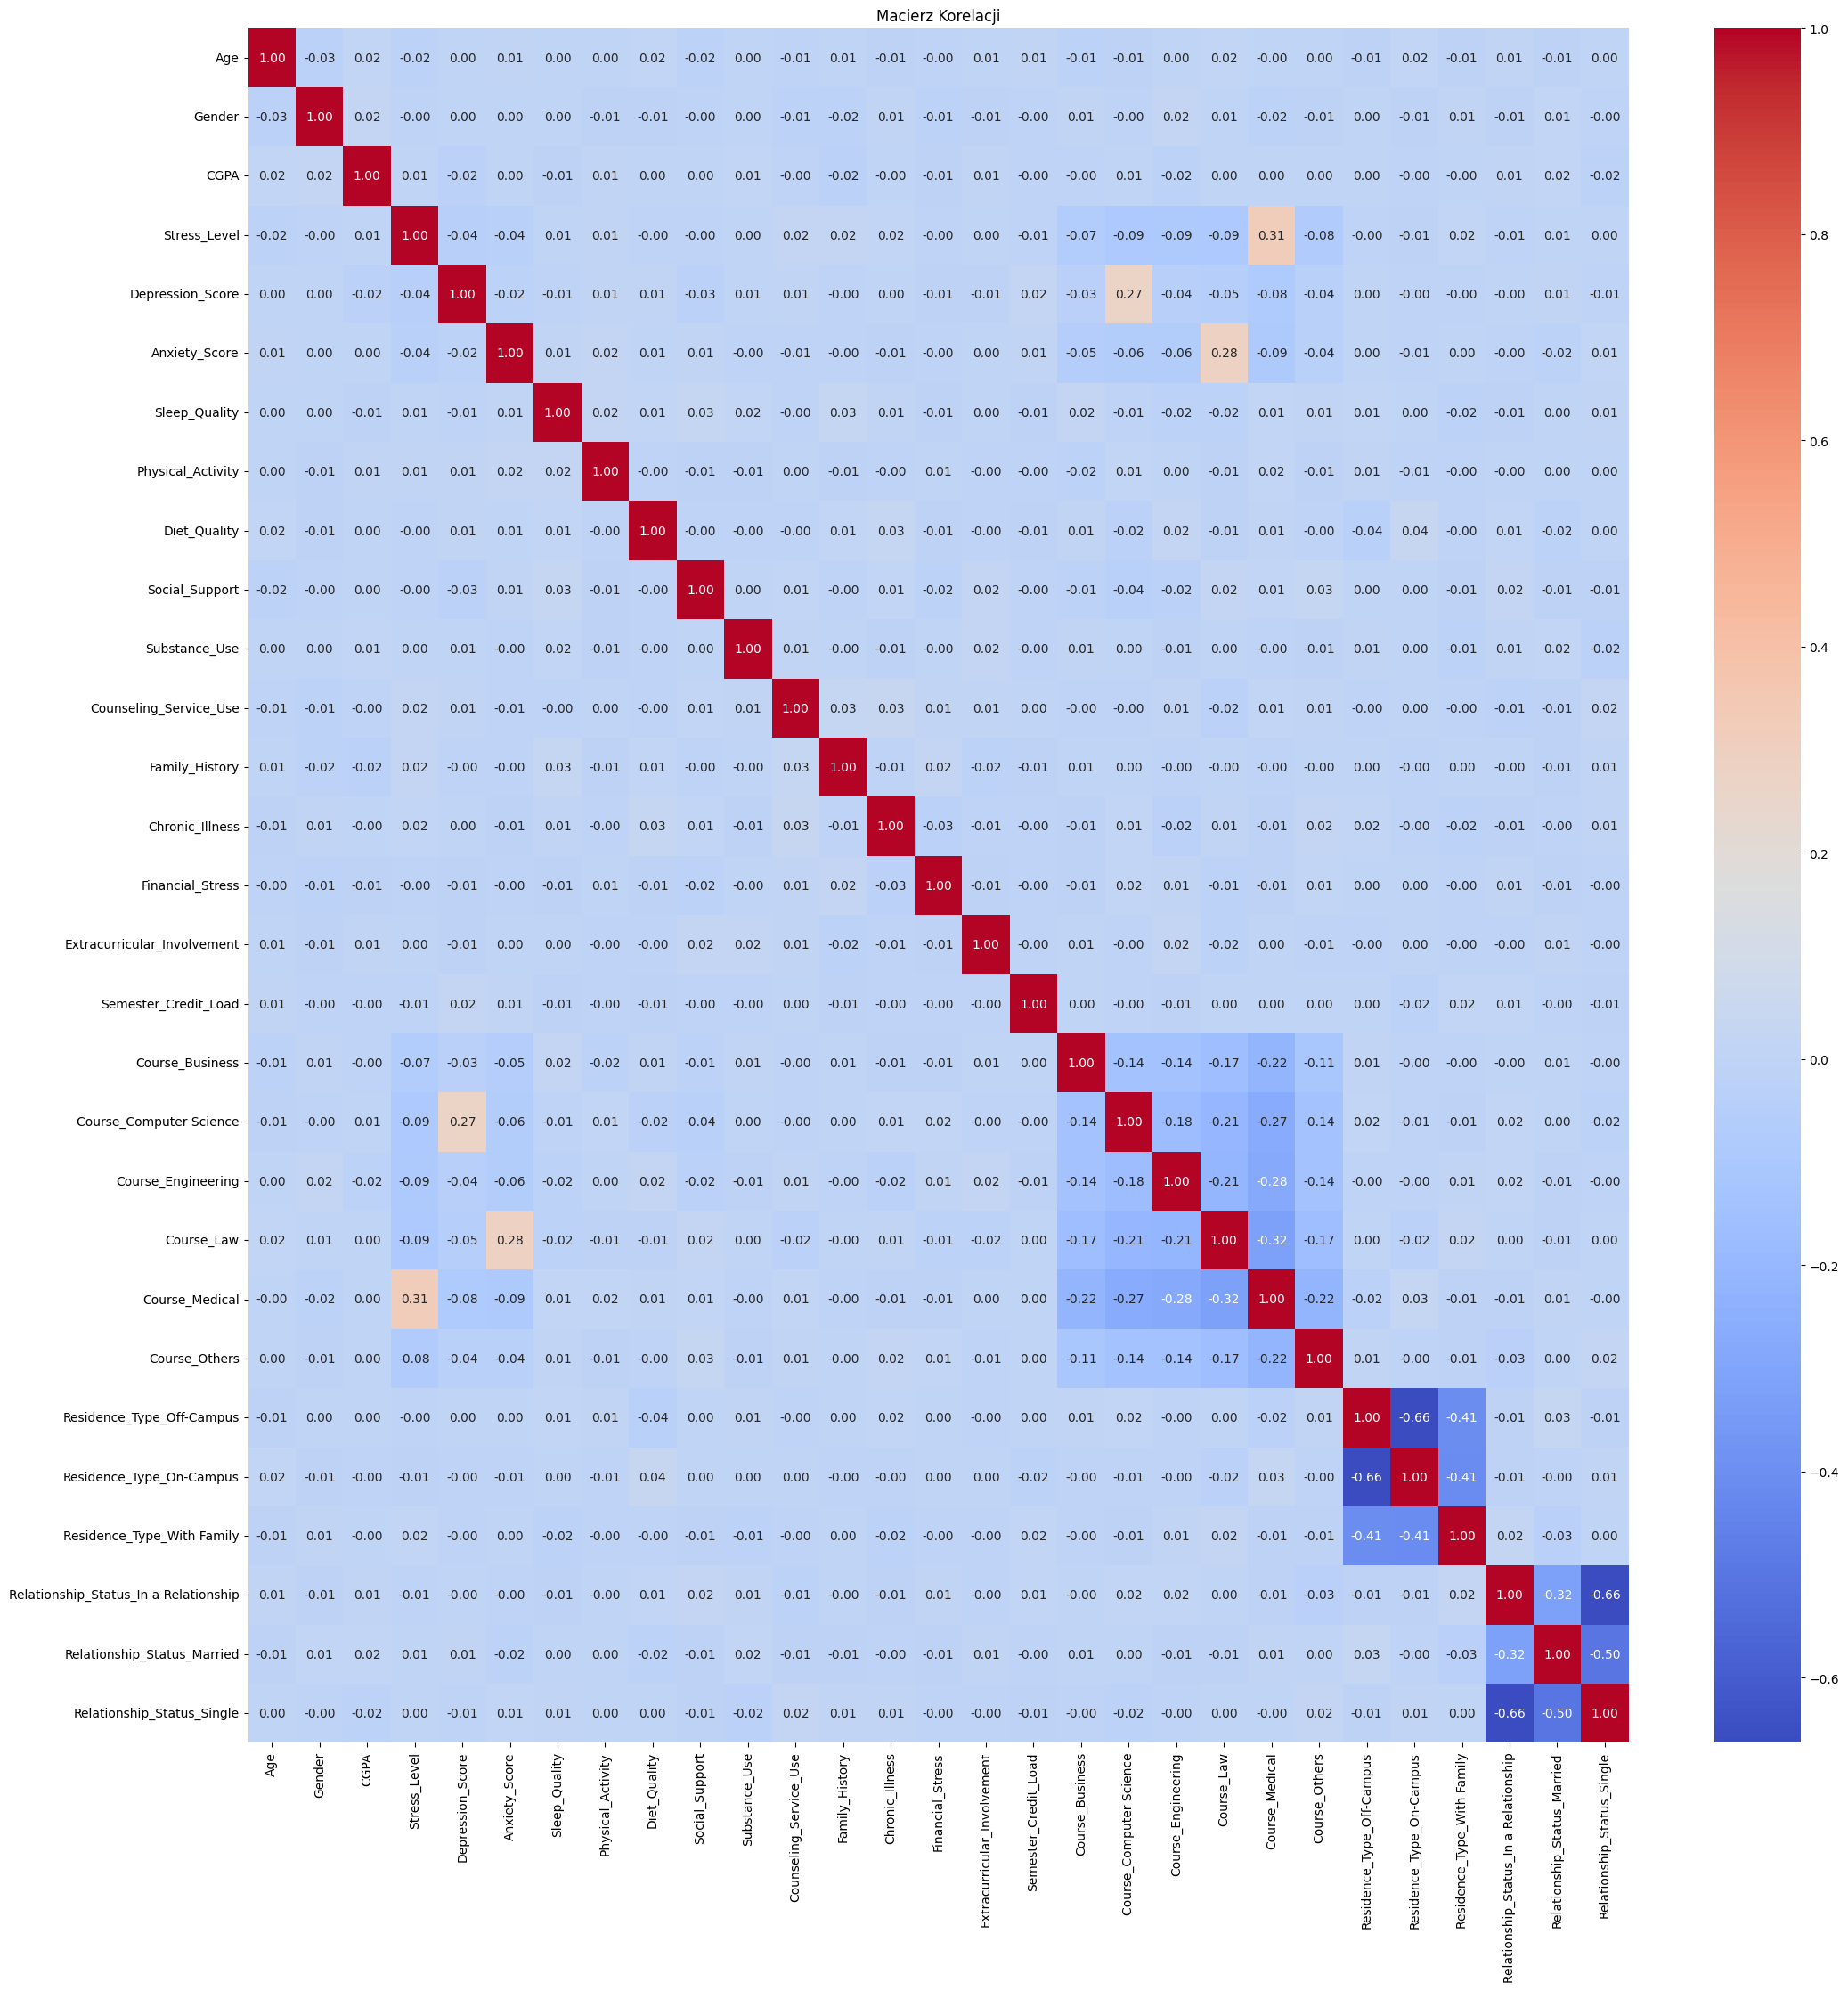

In [46]:
correlation_matrix = df.corr(method='pearson')
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz Korelacji")
plt.show()

In [47]:
# Sprawdzenie liczby wierszy dla każdego kierunku studiów
course_counts = df[['Course_Business', 'Course_Computer Science', 'Course_Engineering', 'Course_Law', 'Course_Medical', 'Course_Others']].sum()
print(course_counts)


Course_Business             715
Course_Computer Science    1022
Course_Engineering         1067
Course_Law                 1381
Course_Medical             2096
Course_Others               714
dtype: int64


# Wpływ **kierunku studiów** na **Depression_Score, Anxiety_Score oraz Stress_Level**
**WYKRESY SŁUPKOWE**



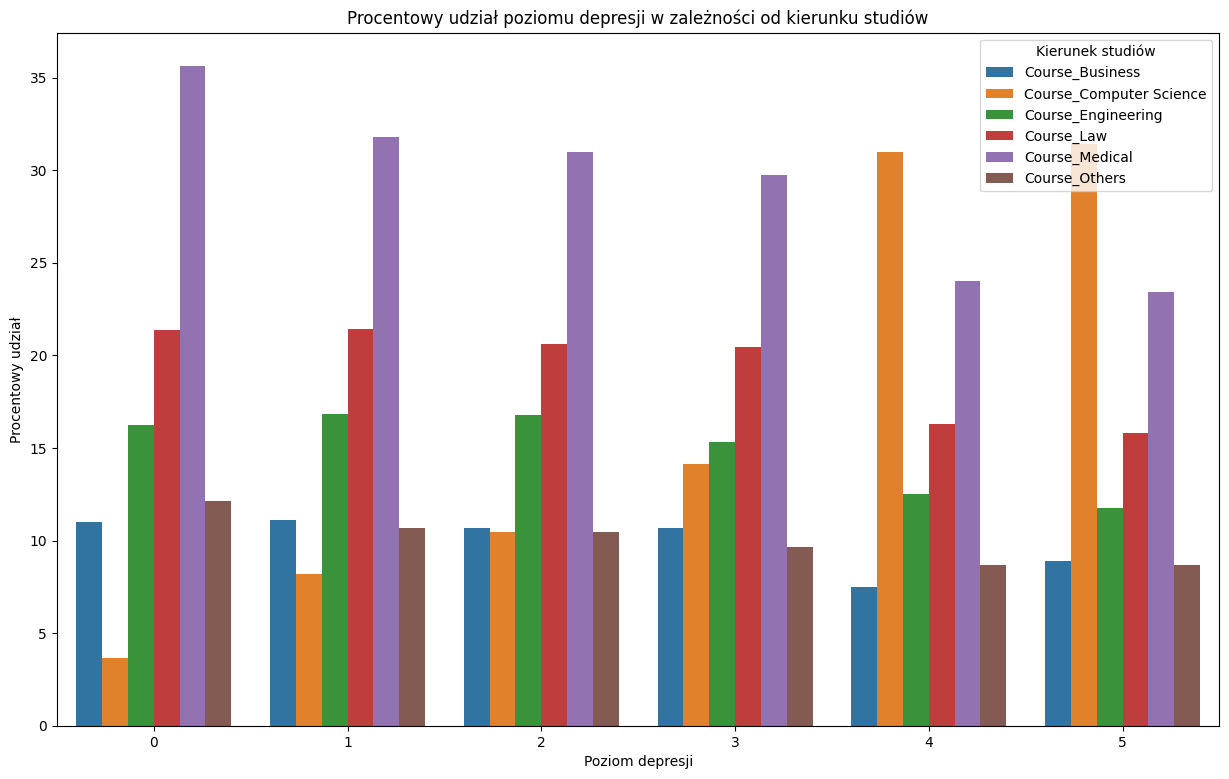

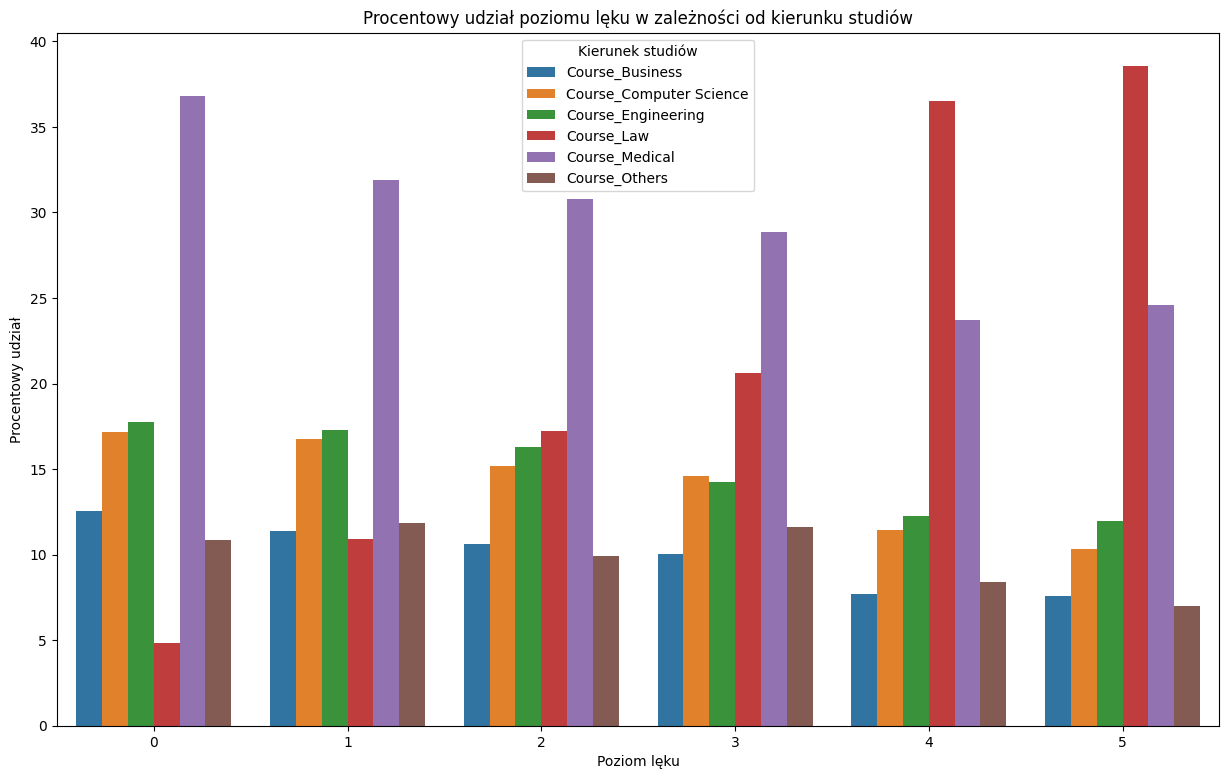

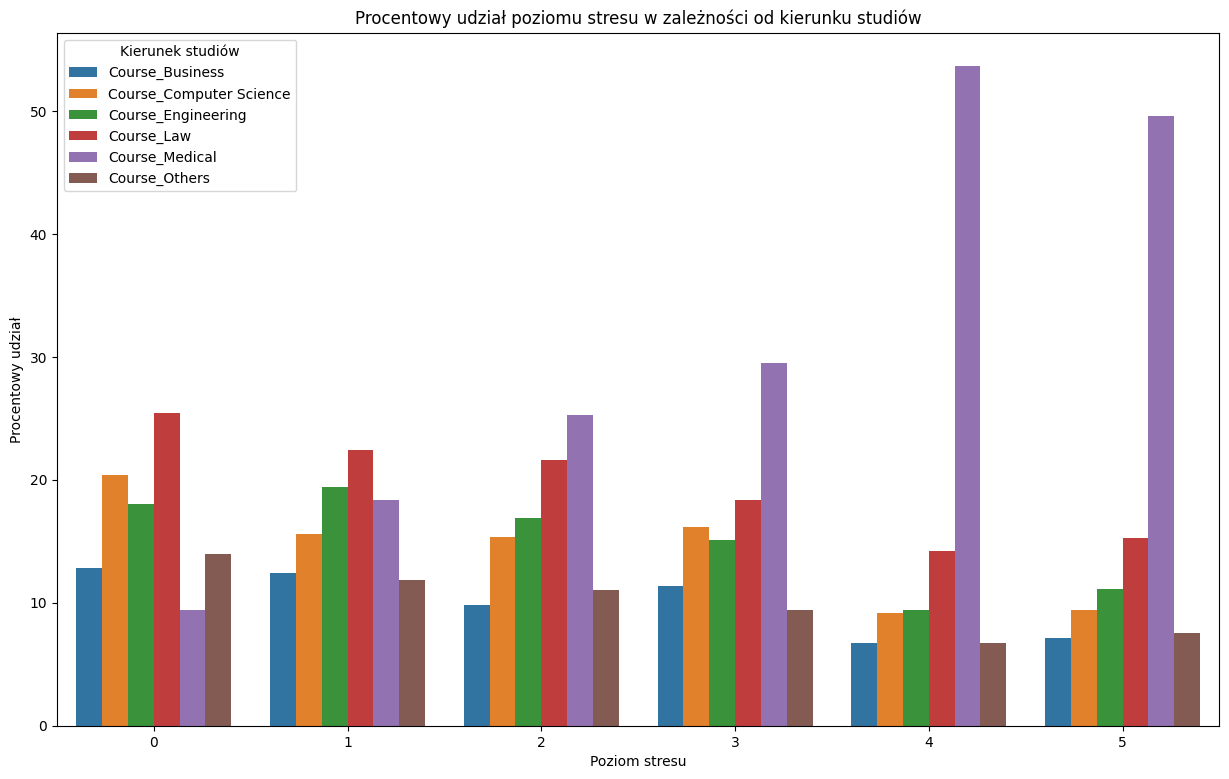

In [48]:
# Przekształcenie danych
df_melted = pd.melt(df, id_vars=['Depression_Score'], value_vars=['Course_Business', 'Course_Computer Science', 'Course_Engineering', 'Course_Law', 'Course_Medical', 'Course_Others'])

# Uzyskanie procentowego udziału dla każdego poziomu depresji i kierunku studiów
df_percent = df_melted.groupby(['Depression_Score', 'variable'])['value'].mean().reset_index()
df_percent['value'] *= 100  # Przemianowanie proporcji na procenty

# Utworzenie wykresu słupkowego
plt.figure(figsize=(15, 9))
sns.barplot(x='Depression_Score', y='value', hue='variable', data=df_percent)
plt.title('Procentowy udział poziomu depresji w zależności od kierunku studiów')
plt.xlabel('Poziom depresji')
plt.ylabel('Procentowy udział')
plt.legend(title='Kierunek studiów')
plt.show()

# Przekształcenie danych
df_melted = pd.melt(df, id_vars=['Anxiety_Score'], value_vars=['Course_Business', 'Course_Computer Science', 'Course_Engineering', 'Course_Law', 'Course_Medical', 'Course_Others'])

# Uzyskanie procentowego udziału dla każdego poziomu depresji i kierunku studiów
df_percent = df_melted.groupby(['Anxiety_Score', 'variable'])['value'].mean().reset_index()
df_percent['value'] *= 100  # Przemianowanie proporcji na procenty

# Utworzenie wykresu słupkowego
plt.figure(figsize=(15, 9))
sns.barplot(x='Anxiety_Score', y='value', hue='variable', data=df_percent)
plt.title('Procentowy udział poziomu lęku w zależności od kierunku studiów')
plt.xlabel('Poziom lęku')
plt.ylabel('Procentowy udział')
plt.legend(title='Kierunek studiów')
plt.show()

# Przekształcenie danych
df_melted = pd.melt(df, id_vars=['Stress_Level'], value_vars=['Course_Business', 'Course_Computer Science', 'Course_Engineering', 'Course_Law', 'Course_Medical', 'Course_Others'])

# Uzyskanie procentowego udziału dla każdego poziomu depresji i kierunku studiów
df_percent = df_melted.groupby(['Stress_Level', 'variable'])['value'].mean().reset_index()
df_percent['value'] *= 100  # Przemianowanie proporcji na procenty

# Utworzenie wykresu słupkowego
plt.figure(figsize=(15, 9))
sns.barplot(x='Stress_Level', y='value', hue='variable', data=df_percent)
plt.title('Procentowy udział poziomu stresu w zależności od kierunku studiów')
plt.xlabel('Poziom stresu')
plt.ylabel('Procentowy udział')
plt.legend(title='Kierunek studiów')
plt.show()


In [49]:
df['High_Depression'] = df['Depression_Score'].isin([4, 5]).astype(int)
count_with_family = df[df['Course_Computer Science'] == 1]['High_Depression'].sum()
count_without_family = df[df['Course_Computer Science'] == 0]['High_Depression'].sum()
odds_ratio = (count_with_family / len(df[df['Course_Computer Science'] == 1])) / (count_without_family / len(df[df['Course_Computer Science'] == 0]))
print(f"Studenci studiujący informatykę są skłonni do odczuwania depresji {odds_ratio:.2f} razy częściej niż studenci pozostałych kierunków.")

df['High_Anxiety'] = df['Anxiety_Score'].isin([4, 5]).astype(int)
count_with_family = df[df['Course_Law'] == 1]['High_Anxiety'].sum()
count_without_family = df[df['Course_Law'] == 0]['High_Anxiety'].sum()
odds_ratio = (count_with_family / len(df[df['Course_Law'] == 1])) / (count_without_family / len(df[df['Course_Law'] == 0]))
print(f"Studenci studiujący prawo są skłonni do odczuwania lęku {odds_ratio:.2f} razy częściej niż studenci pozostałych kierunków.")

df['High_Stress'] = df['Stress_Level'].isin([4, 5]).astype(int)
count_with_family = df[df['Course_Medical'] == 1]['High_Stress'].sum()
count_without_family = df[df['Course_Medical'] == 0]['High_Stress'].sum()
odds_ratio = (count_with_family / len(df[df['Course_Medical'] == 1])) / (count_without_family / len(df[df['Course_Medical'] == 0]))
print(f"Studenci studiujący medycynę są skłonni do stresowania się {odds_ratio:.2f} razy częściej niż studenci pozostałych kierunków.")

Studenci studiujący informatykę są skłonni do odczuwania depresji 2.65 razy częściej niż studenci pozostałych kierunków.
Studenci studiujący prawo są skłonni do odczuwania lęku 2.44 razy częściej niż studenci pozostałych kierunków.
Studenci studiujący medycynę są skłonni do stresowania się 2.49 razy częściej niż studenci pozostałych kierunków.


Text(0, 0.5, 'Stress_Level')

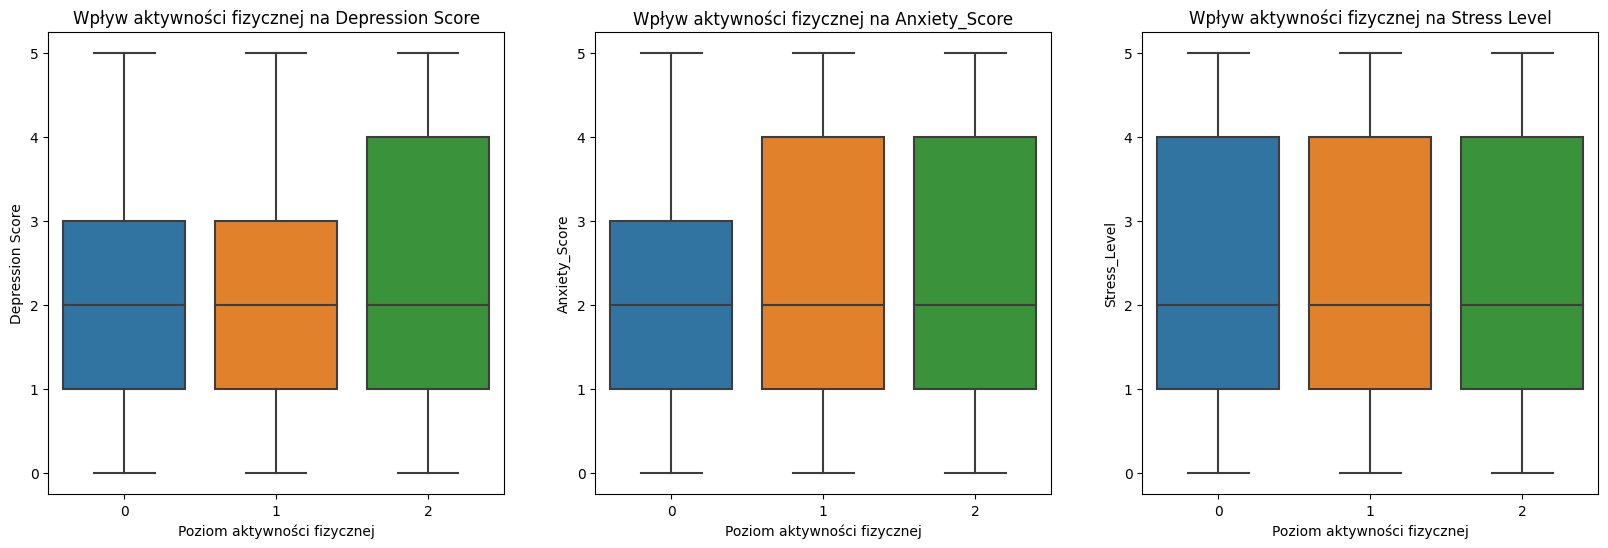

In [50]:
# Tworzenie trzech wykresów obok siebie
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Wykres dla Depression_Score
sns.boxplot(x='Physical_Activity', y='Depression_Score', data=df, ax=axes[0])
axes[0].set_title('Wpływ aktywności fizycznej na Depression Score')
axes[0].set_xlabel('Poziom aktywności fizycznej')
axes[0].set_ylabel('Depression Score')

# Wykres dla Anxiety_Score
sns.boxplot(x='Physical_Activity', y='Anxiety_Score', data=df, ax=axes[1])
axes[1].set_title('Wpływ aktywności fizycznej na Anxiety_Score')
axes[1].set_xlabel('Poziom aktywności fizycznej')
axes[1].set_ylabel('Anxiety_Score')

# Wykres dla Stress_Level
sns.boxplot(x='Physical_Activity', y='Stress_Level', data=df, ax=axes[2])
axes[2].set_title('Wpływ aktywności fizycznej na Stress Level')
axes[2].set_xlabel('Poziom aktywności fizycznej')
axes[2].set_ylabel('Stress_Level')


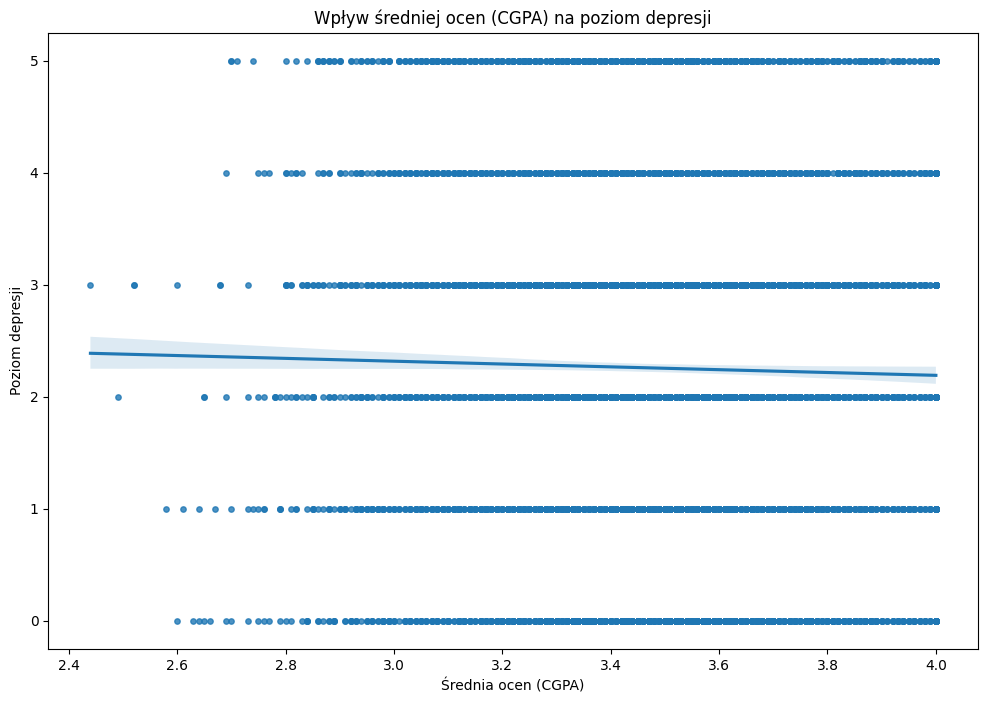

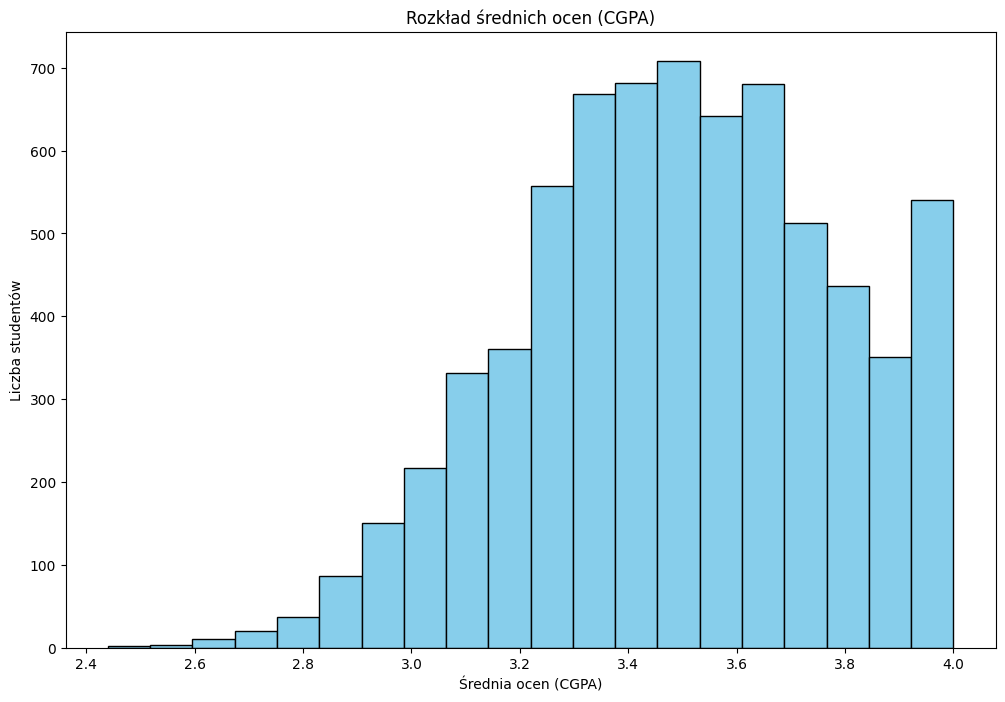

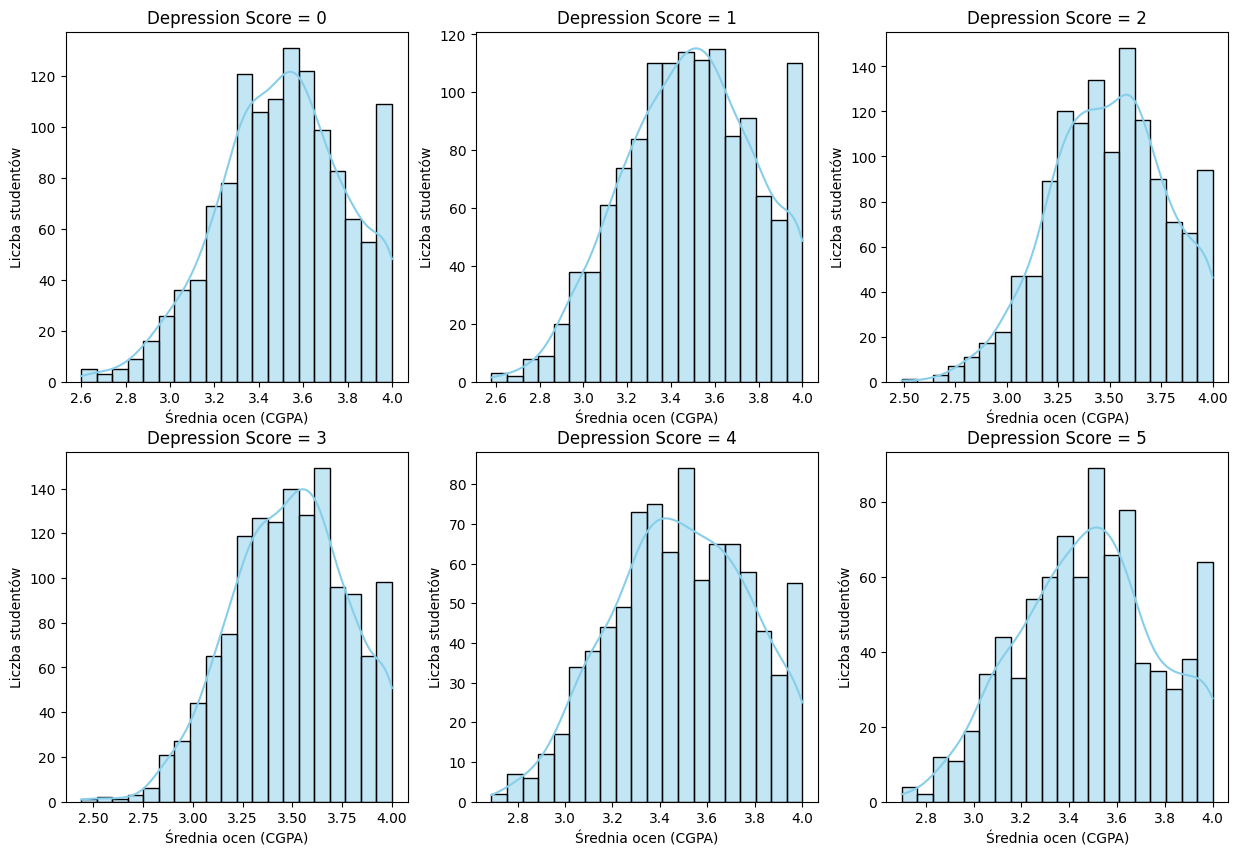

In [51]:
### Z macierzy korelacji wynika, że średnia ocen (CGPA) wpływa na depression_Score. Poniżej badanie zależności tych zmiennych.
# Tworzenie wykresu punktowego z regresją liniową
# Jak widać wraz ze wzrostem średniej maleje poziom depresji i na odwrót.
plt.figure(figsize=(12, 8))
sns.regplot(x='CGPA', y='Depression_Score', data=df, scatter_kws={'s': 15})
plt.title('Wpływ średniej ocen (CGPA) na poziom depresji')
plt.xlabel('Średnia ocen (CGPA)')
plt.ylabel('Poziom depresji')
plt.show()

# Tworzenie histogramu
plt.figure(figsize=(12, 8))
plt.hist(df['CGPA'], bins=20, color='skyblue', edgecolor='black')
plt.title('Rozkład średnich ocen (CGPA)')
plt.xlabel('Średnia ocen (CGPA)')
plt.ylabel('Liczba studentów')
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Dostosowanie układu
plt.figure(figsize=(15, 10))

# Iteracja po różnych poziomach Depression_Score
for score in sorted(df['Depression_Score'].unique()):
    plt.subplot(2, 3, score + 1)
    sns.histplot(df[df['Depression_Score'] == score]['CGPA'], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Depression Score = {score}')
    plt.xlabel('Średnia ocen (CGPA)')
    plt.ylabel('Liczba studentów')


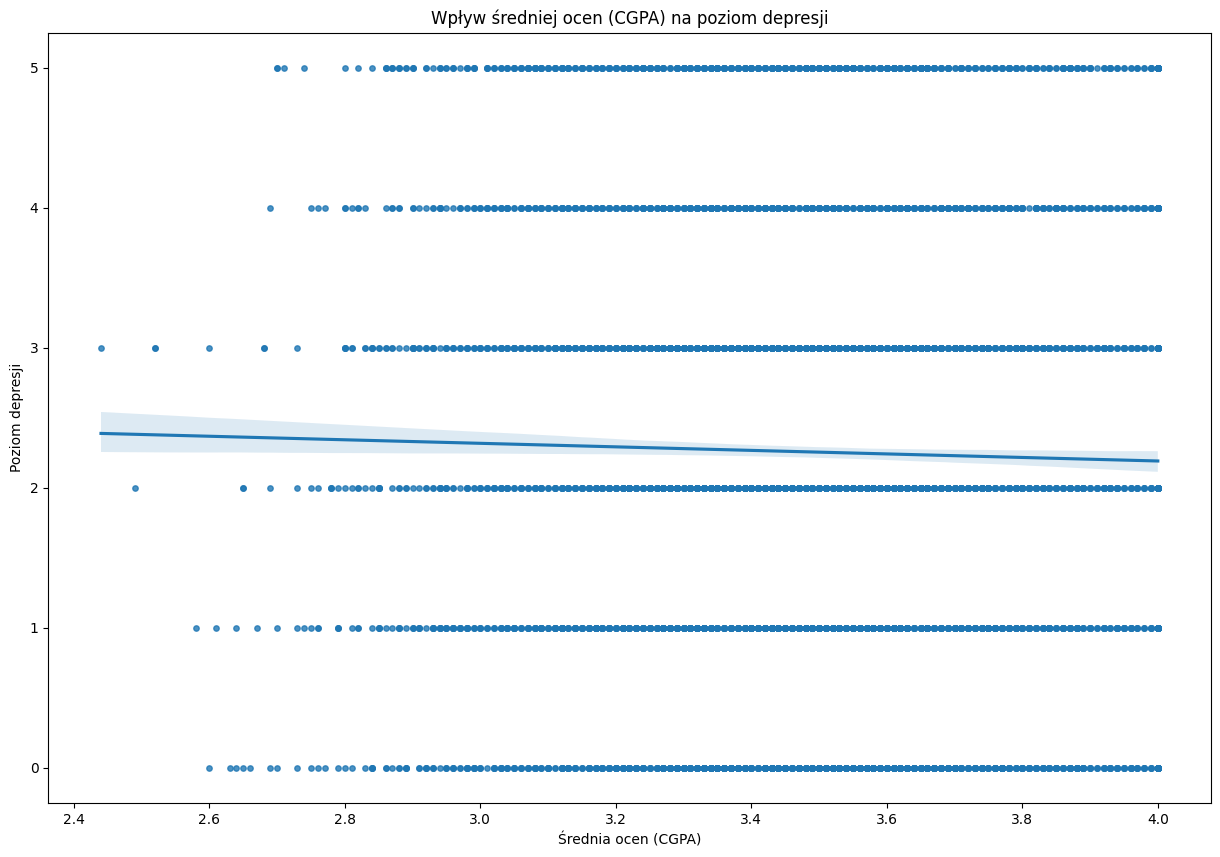

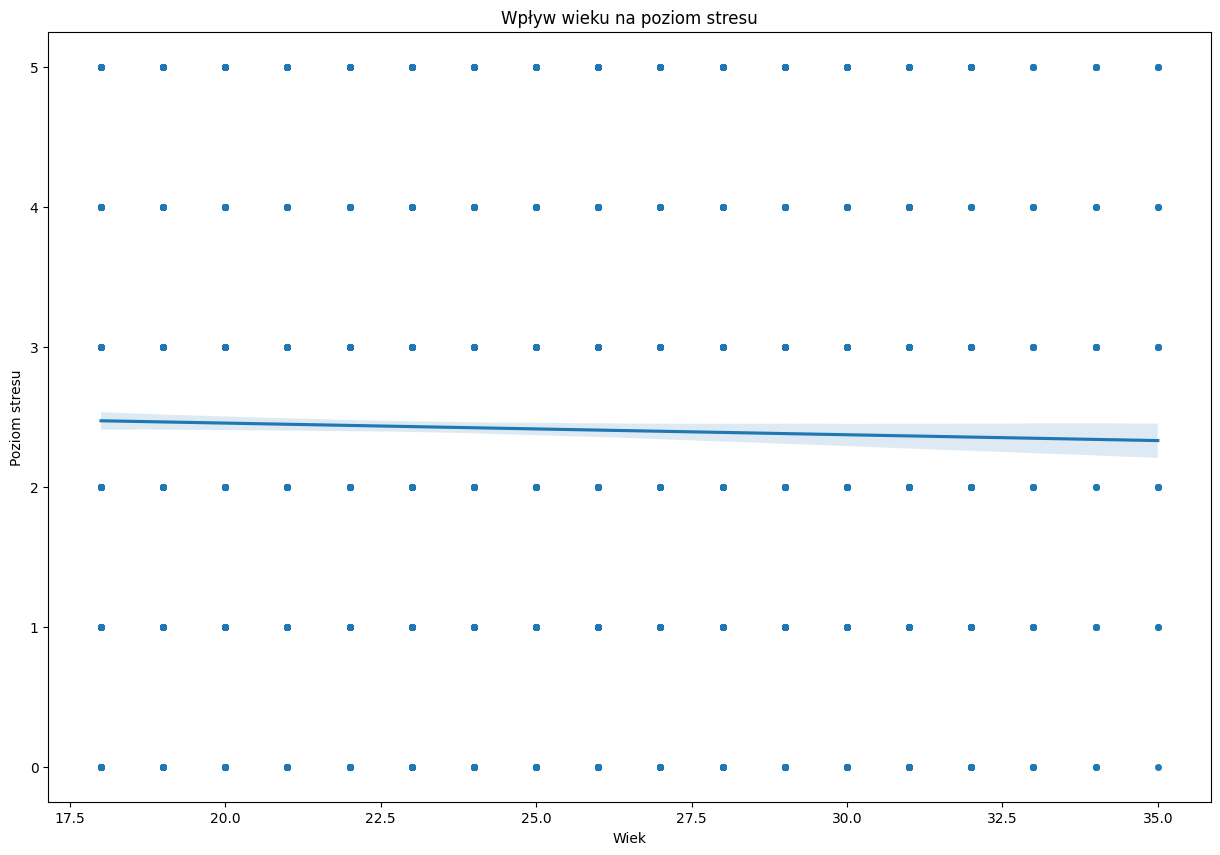

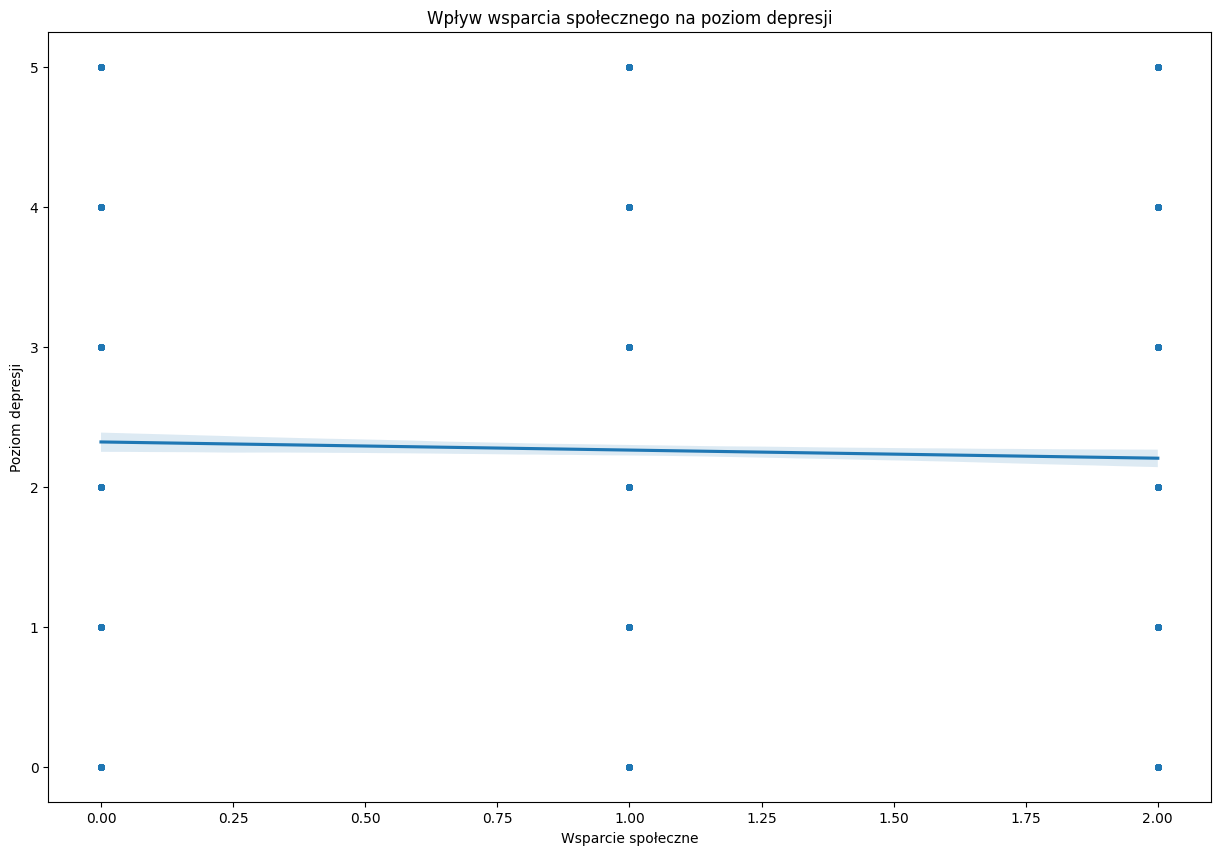

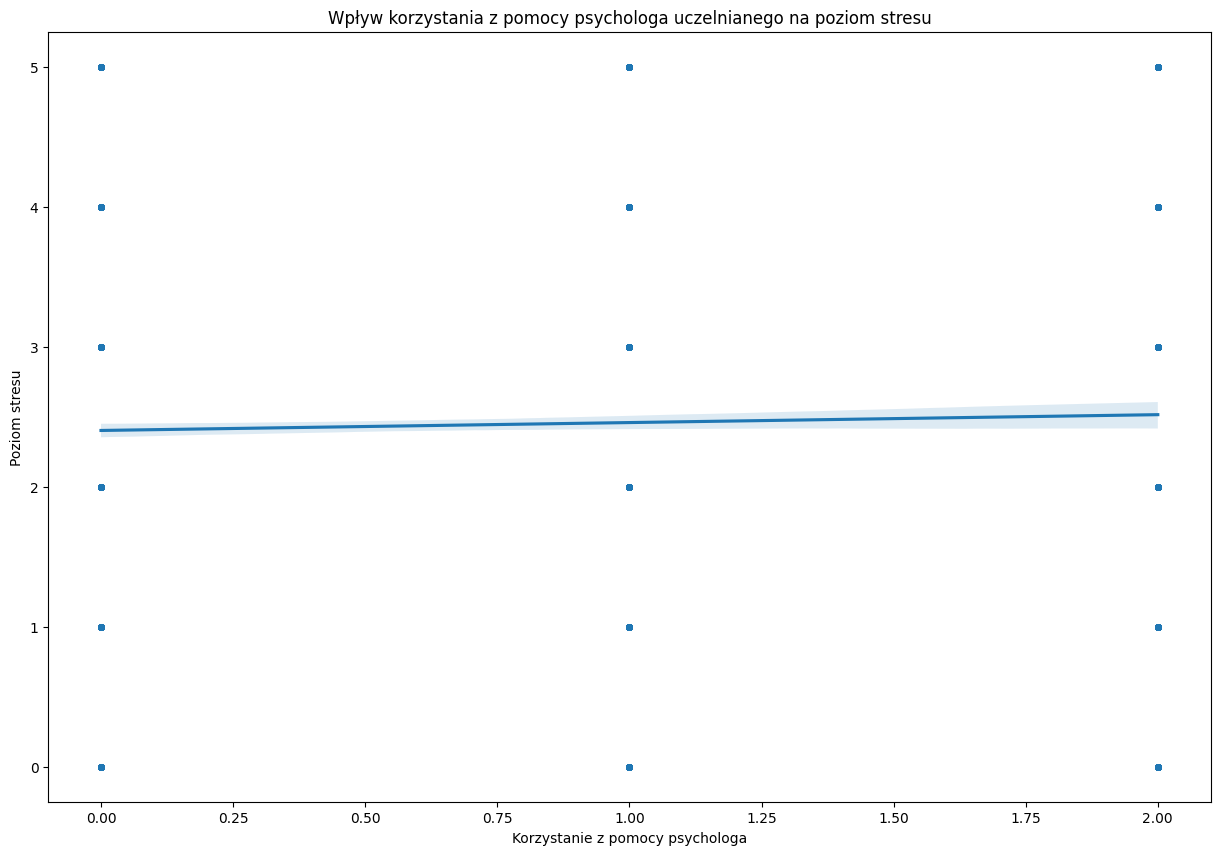

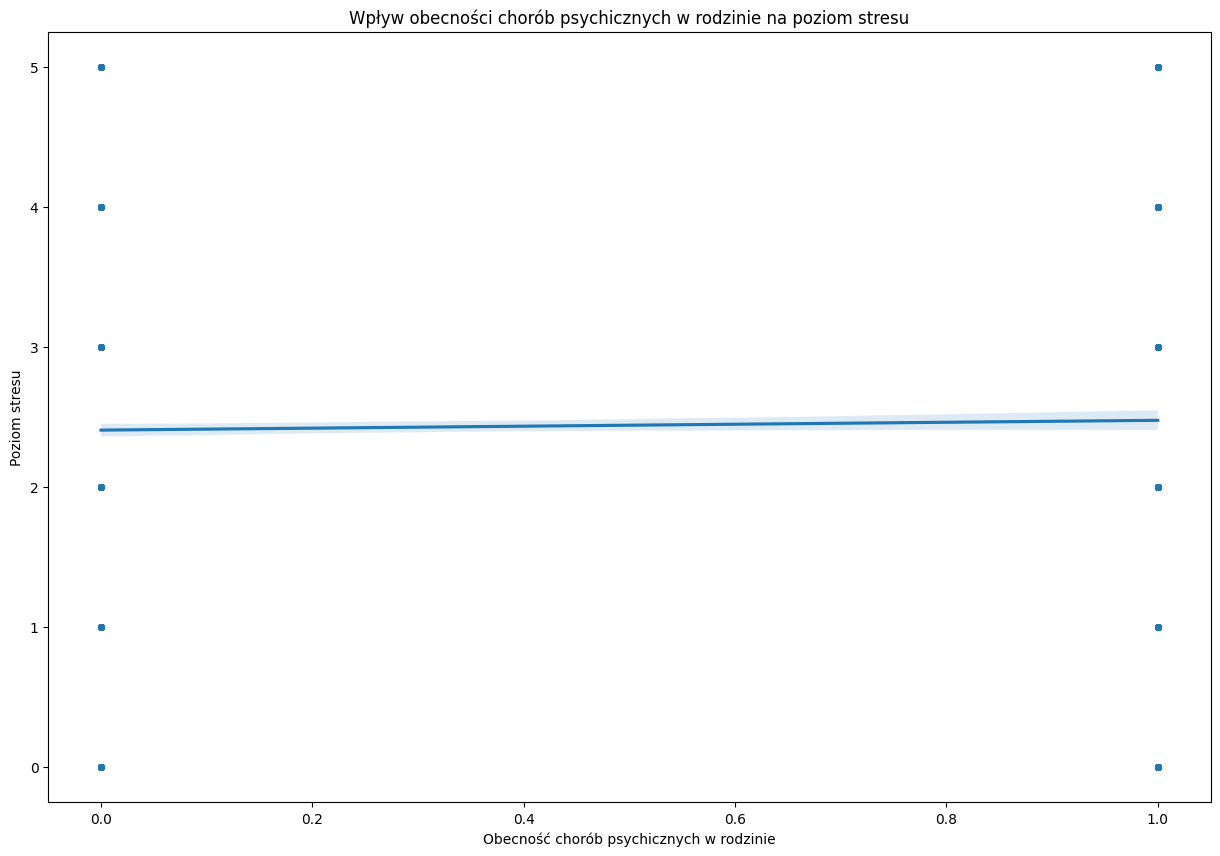

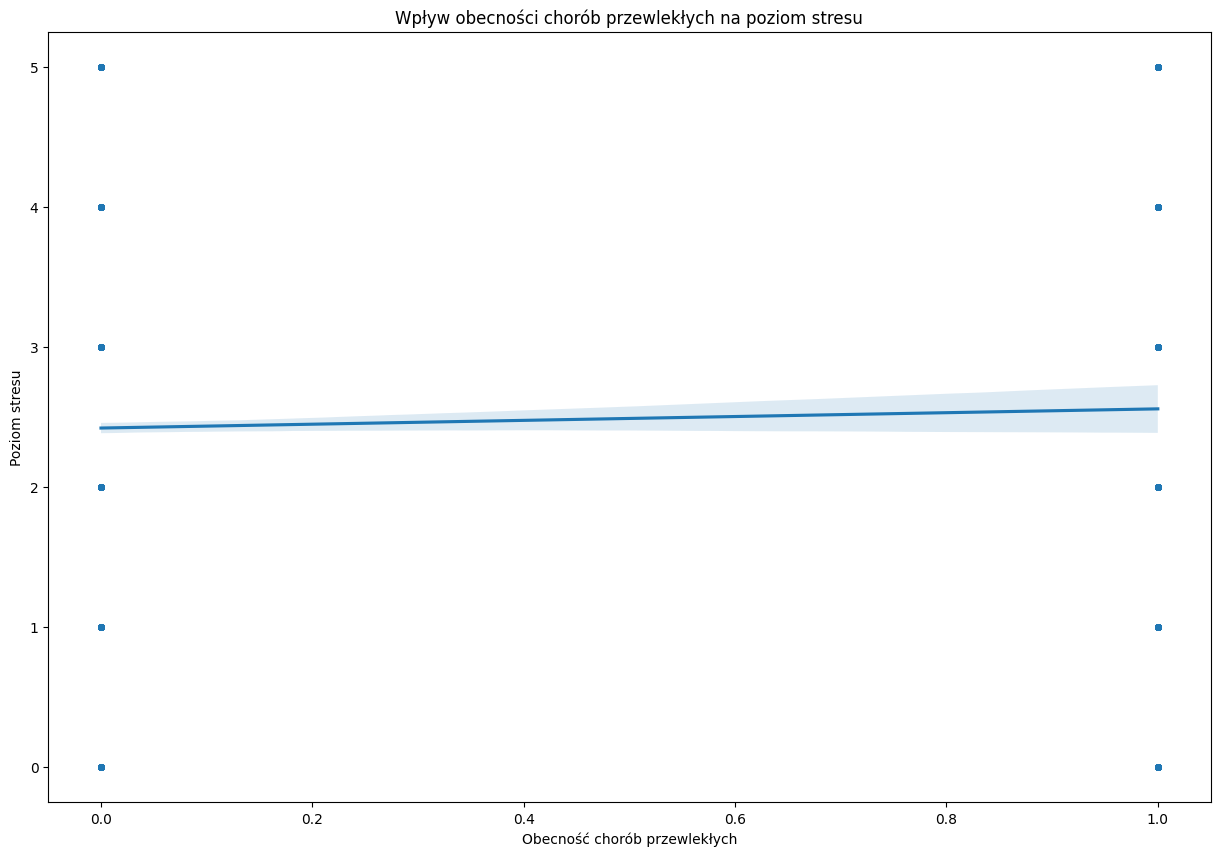

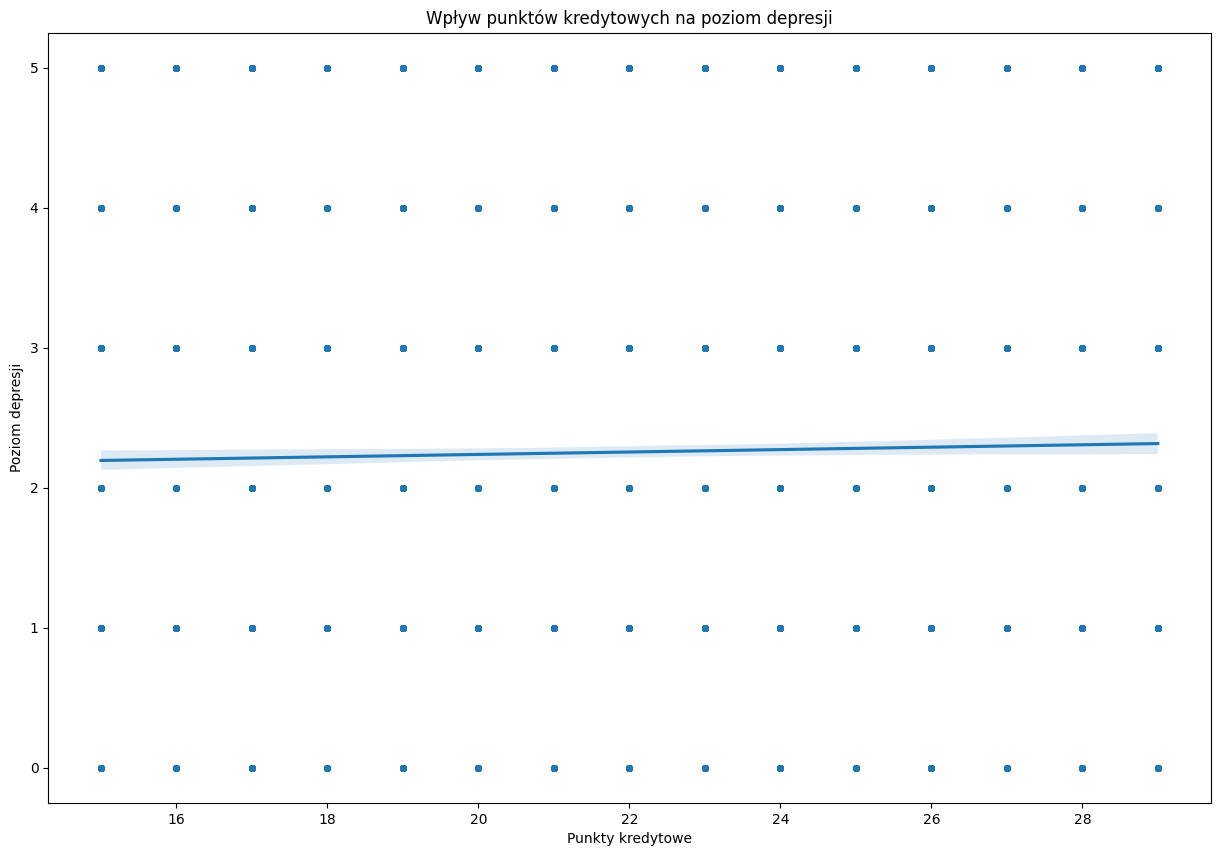

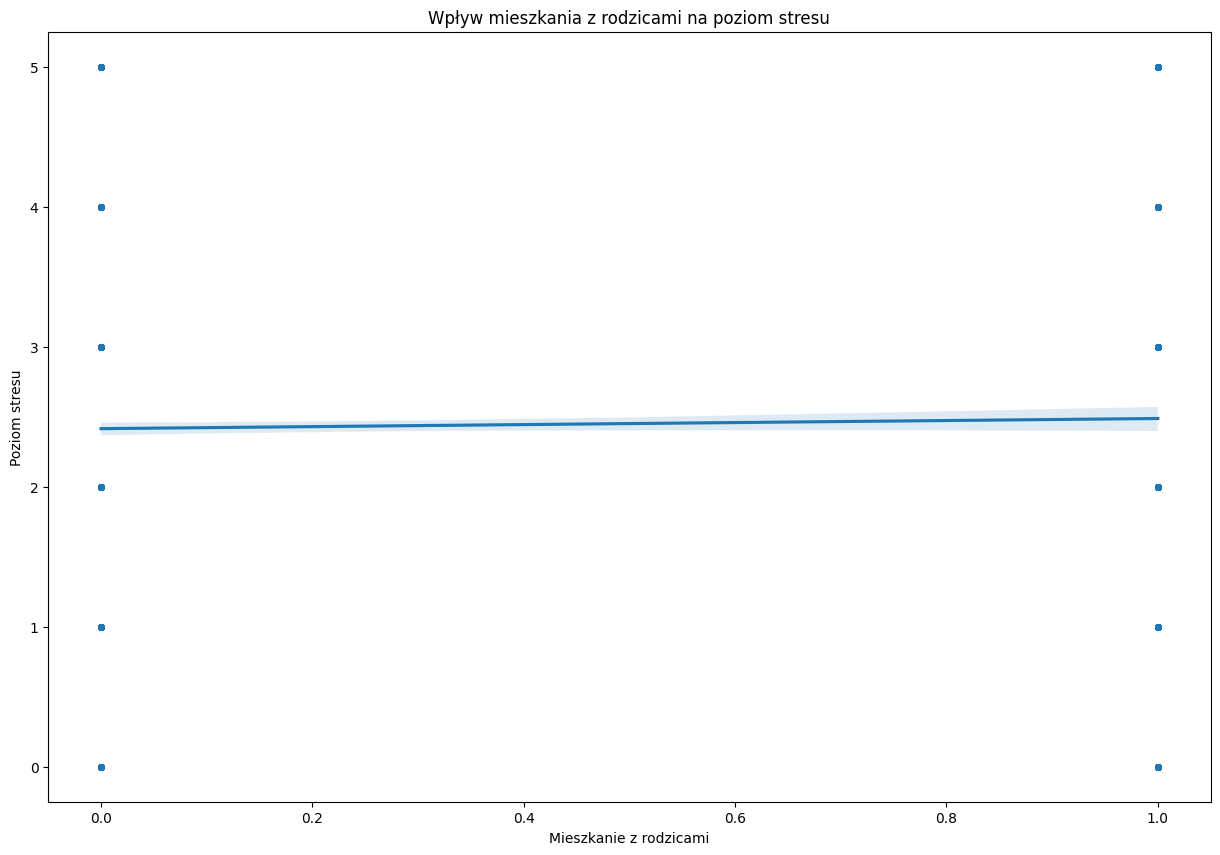

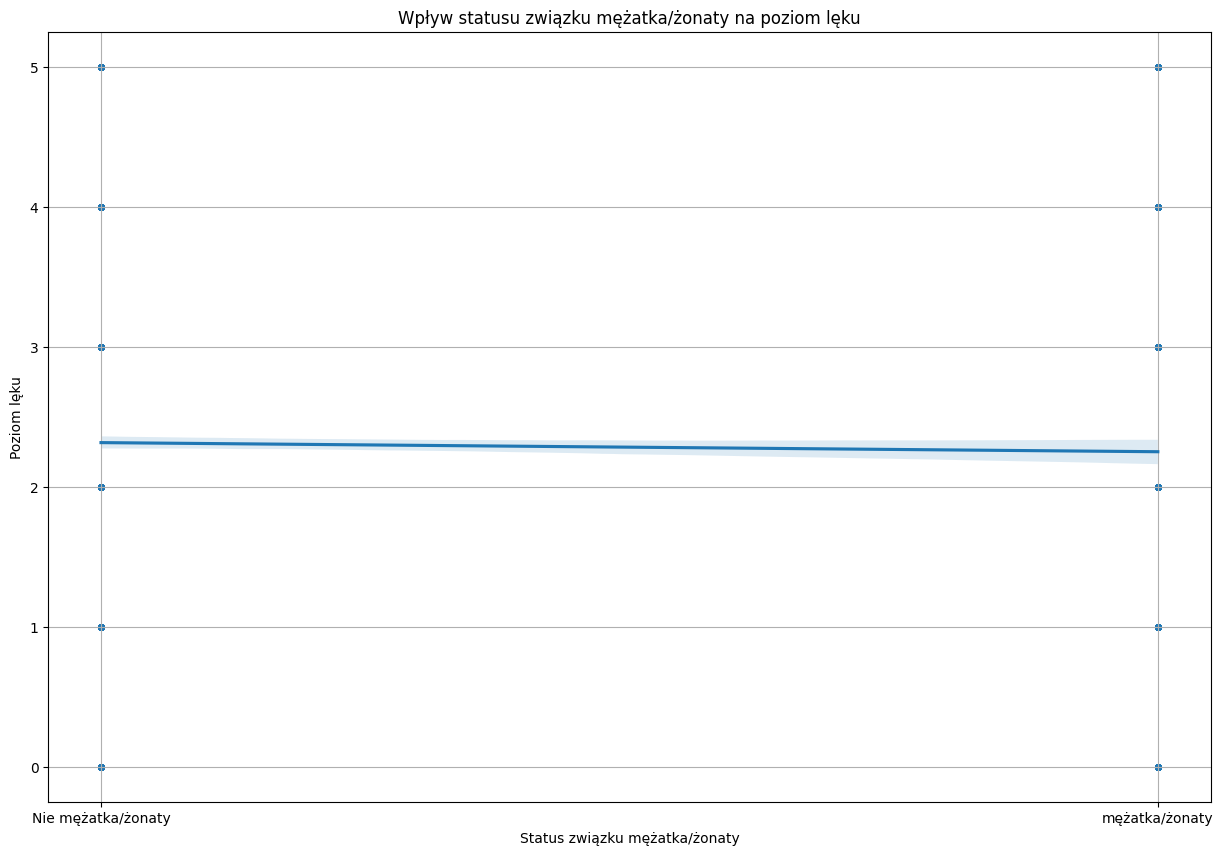

In [54]:
# Analiza regresji
plt.figure(figsize=(15, 10))
sns.regplot(x='CGPA', y='Depression_Score', data=df,scatter_kws={'s': 15})
plt.title('Wpływ średniej ocen (CGPA) na poziom depresji')
plt.xlabel('Średnia ocen (CGPA)')
plt.ylabel('Poziom depresji')
plt.show()

plt.figure(figsize=(15, 10))
sns.regplot(x='Age', y='Stress_Level', data=df,scatter_kws={'s': 15})
plt.title('Wpływ wieku na poziom stresu')
plt.xlabel('Wiek')
plt.ylabel('Poziom stresu')
plt.show()

# Analiza regresji
plt.figure(figsize=(15, 10))
sns.regplot(x='Social_Support', y='Depression_Score', data=df,scatter_kws={'s': 15})
plt.title('Wpływ wsparcia społecznego na poziom depresji')
plt.xlabel('Wsparcie społeczne')
plt.ylabel('Poziom depresji')
plt.show()

# Analiza regresji
plt.figure(figsize=(15, 10))
sns.regplot(x='Counseling_Service_Use', y='Stress_Level', data=df,scatter_kws={'s': 15})
plt.title('Wpływ korzystania z pomocy psychologa uczelnianego na poziom stresu')
plt.xlabel('Korzystanie z pomocy psychologa')
plt.ylabel('Poziom stresu')
plt.show()

# Analiza regresji
plt.figure(figsize=(15, 10))
sns.regplot(x='Family_History', y='Stress_Level', data=df,scatter_kws={'s': 15})
plt.title('Wpływ obecności chorób psychicznych w rodzinie na poziom stresu')
plt.xlabel('Obecność chorób psychicznych w rodzinie')
plt.ylabel('Poziom stresu')
plt.show()

# Analiza regresji
plt.figure(figsize=(15, 10))
sns.regplot(x='Chronic_Illness', y='Stress_Level', data=df,scatter_kws={'s': 15})
plt.title('Wpływ obecności chorób przewlekłych na poziom stresu')
plt.xlabel('Obecność chorób przewlekłych')
plt.ylabel('Poziom stresu')
plt.show()

# Analiza regresji
plt.figure(figsize=(15, 10))
sns.regplot(x='Semester_Credit_Load', y='Depression_Score', data=df,scatter_kws={'s': 15})
plt.title('Wpływ punktów kredytowych na poziom depresji')
plt.xlabel('Punkty kredytowe')
plt.ylabel('Poziom depresji')
plt.show()

# Analiza regresji
plt.figure(figsize=(15, 10))
sns.regplot(x='Residence_Type_With Family', y='Stress_Level', data=df,scatter_kws={'s': 15})
plt.title('Wpływ mieszkania z rodzicami na poziom stresu')
plt.xlabel('Mieszkanie z rodzicami')
plt.ylabel('Poziom stresu')
plt.show()

# Analiza regresji
plt.figure(figsize=(15, 10))
sns.regplot(x='Relationship_Status_Married', y='Anxiety_Score', data=df, scatter_kws={'s': 15})
plt.title('Wpływ statusu związku mężatka/żonaty na poziom lęku')
plt.xlabel('Status związku mężatka/żonaty')
plt.ylabel('Poziom lęku')
plt.xticks([0, 1], ['Nie mężatka/żonaty', 'mężatka/żonaty'])
plt.grid(True)  # Dodanie siatki
plt.show()

In [ ]:
# Tworzenie trzech wykresów pudełkowych na jednym
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Wykres dla Residence_Type_Off-Campus
sns.boxplot(x='Residence_Type_Off-Campus', y='Stress_Level', data=df, ax=axes[0])
axes[0].set_title('Residence_Type_Off-Campus')
axes[0].set_xlabel('Residence_Type_Off-Campus')
axes[0].set_ylabel('Stress_Level')

# Wykres dla Residence_Type_On-Campus
sns.boxplot(x='Residence_Type_On-Campus', y='Stress_Level', data=df, ax=axes[1])
axes[1].set_title('Residence_Type_On-Campus')
axes[1].set_xlabel('Residence_Type_On-Campus')
axes[1].set_ylabel('Stress_Level')

# Wykres dla Residence_Type_With_Family
sns.boxplot(x='Residence_Type_With Family', y='Stress_Level', data=df, ax=axes[2])
axes[2].set_title('Residence_Type_With Family')
axes[2].set_xlabel('Residence_Type_With Family')
axes[2].set_ylabel('Stress_Level')

plt.show()


In [ ]:
df['High_Stress'] = df['Stress_Level'].isin([4, 5]).astype(int)

count_with_family = df[df['Residence_Type_With Family'] == 1]['High_Stress'].sum()
count_without_family = df[df['Residence_Type_With Family'] == 0]['High_Stress'].sum()

odds_ratio = (count_with_family / len(df[df['Residence_Type_With Family'] == 1])) / (count_without_family / len(df[df['Residence_Type_With Family'] == 0]))

print(f"Studenci mieszkający z rodzicami są skłonni do stresowania się {odds_ratio:.2f} razy częściej niż studenci nie mieszkający z rodzicami.")

In [ ]:
ax = sns.boxplot(x="Depression_Score", y="Gender", data=df, orient='h', color = 'gray')

df['High_Depression'] = df['Depression_Score'].isin([4, 5]).astype(int)
count_with_family = df[df['Gender'] == 1]['High_Depression'].sum()
count_without_family = df[df['Gender'] == 0]['High_Depression'].sum()
odds_ratio = (count_with_family / len(df[df['Gender'] == 1])) / (count_without_family / len(df[df['Gender'] == 0]))
print(f"Kobiety są słonne do odczuwania depresji {odds_ratio:.2f} razy częściej niż mężczyźni.")

count_female = df[df['Gender'] == 1]['High_Depression'].sum()
count_male = df[df['Gender'] == 0]['High_Depression'].sum()

percentage_difference = ((count_female / len(df[df['Gender'] == 1])) - (count_male / len(df[df['Gender'] == 0]))) * 100

print(f"Kobiety są skłonne do odczuwania depresji o {abs(percentage_difference):.2f}% więcej niż mężczyźni.")


Poniżej **BRUDNOPIS**

In [ ]:
# Podział danych na zbiór treningowy i testowy
X = df.drop('Stress_Level', axis=1)  # Zmienna niezależna
y = df['Stress_Level']  # Zmienna zależna

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Inicjalizacja modelu Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trenowanie modelu
model.fit(X_train, y_train)

# Przewidywanie
predictions = model.predict(X_test)

# Ocenianie modelu
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")


In [ ]:
ax = sns.boxplot(x="Anxiety_Score", y="Gender", data=df, orient='h', color = 'gray')

In [ ]:
# Podział danych na zbiór treningowy i testowy
X = df.drop('Stress_Level', axis=1)  # Zmienna niezależna
y = df['Stress_Level']  # Zmienna zależna

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Inicjalizacja modelu Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trenowanie modelu
model.fit(X_train, y_train)

# Przewidywanie
predictions = model.predict(X_test)

# Ocenianie modelu
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")
